# Izpit 13. februar 2024

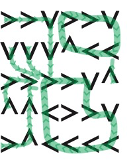
     
Kot vemo, so ljubljanski kolesarji sami divjaki in ne prilagodijo svoje hitrosti, ko se znajdejo na snežnih poljanah ljubljanskih pločnikov. Zato jih po sledeh ne nosi le tri korake, kot v domači nalogi, temveč se zgodi, kar kaže slika: kolesar v neskončnost vozi po poti, ki jo kažejo puščice. Na sliki se bo prej ko slej znašel v enem od dveh ciklov. Predpostaviti smemo, da nobena puščica ne kaže ven iz polja.
Razpored puščic bo v teh nalogah podan v obliki seznama nizov. Sliko na desni predstavimo z [">>v>>v", "vvv^<<", ">>>>v^", "^^<>>v", ">^<<<<"].


## 1. Unzip

Napiši funkcijo `unzip(s, sirina)`, ki sprejme zemljevid v stisnjeni obliki in njegovo širino. Funkcija mora vrniti zemljevid v obliki seznama nizov. Tako klic `unzip(">1v>1v3^<1>3v^2<>>v>^<3", 6)` vrne natančno gornji zemljevid.

Števka za znakom pove, koliko ponovitev posamičnega znaka je potrebno še dodati. Tako, recimo, `>2` pomeni `>`, ki mu sledita še dva `>`. Torej `>2` pomeni `>>>`. Številko vedno beremo po števkah: `>56` ne pomeni `>` in še `56` `>`-jev, temveč `>`, in še `5` `>`-jev in še `6` `>`-jev (torej, skupno `12` `>`-jev). Gornji niz `>1v>1v3^<1>3v^2<>>v>^<3` bo funkcija torej najprej raztegnila v `'>>v>>vvvv^<<>>>>v^^^<>>v>^<<<<'`, potem pa ga razbila po vrsticah, tako da bo v vsaki 6 (drugi argument!) znakov.

### Rešitev

Kdor je ubogal in programiral, kot veli zadnji stavek, je ravnal pametno. Mnogi so poskušali narediti oba koraka skupaj, torej istočasno odzipavati in deliti v vrstice. To se navadno ni obneslo.

Glavni trik je, da takrat, ko naletimo na števko, dodamo ponovitev zadnjega znaka. Tega si lahko zapomnimo, lahko pa preprosto pogledamo, kateri je zadnji znak v odzipanem nizu.

In [1]:
def unzip(podatki, sirina):
    odzipano = ""
    for c in podatki:
        if c.isdigit():
            odzipano += odzipano[-1] * int(c)
        else:
            odzipano += c

    zemljevid = []
    for i in range(0, len(odzipano), sirina):
        zemljevid.append(odzipano[i:i + sirina])
    return zemljevid

Uporabili smo metodo `isdigit()`. Če ne vemo zanjo, lahko pišemo tudi `if c in "0123456789"`. Manj modro je pisati `if c in ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]`, saj izpit traja "samo" 90 minut. Še manj modro je pisati `if c in "0" or c in "1" or c in "2" or c in "3" or c in "4" or c in "5" or c in "6" or c in "7" or c in "8" or c in "9"`. Kakorkoli, `isdigit`.

Drugi del enostavno odpikamo z izpeljanim seznamom.

In [2]:
def unzip(podatki, sirina):
    odzipano = ""
    for c in podatki:
        if c.isdigit():
            odzipano += odzipano[-1] * int(c)
        else:
            odzipano += c
    return [odzipano[i:i + sirina] for i in range(0, len(odzipano), sirina)]

Eden do študentov je odkril modul `textwrap`. Imenitno.

In [3]:
import textwrap

def unzip(podatki, sirina):
    odzipano = ""
    for c in podatki:
        if c.isdigit():
            odzipano += odzipano[-1] * int(c)
        else:
            odzipano += c
    return textwrap.wrap(odzipano, sirina)

Če s Tobijem združiva moči, pa zmagava.

In [5]:
import textwrap
import functools

def unzip(podatki, sirina):
    return textwrap.wrap(
        functools.reduce(lambda x, y: x + (x[-1] * int(y) if y.isdigit() else y), podatki, ""),
        sirina)

## 2. Pred ciklom

Napiši funkcijo `pred_ciklom(zemljevid, x, y)`, ki sprejme zemljevid in neko začetno koordinato ter vrne število korakov, po katerih se kolesar znajde v ciklu. Klic `pred_ciklom(sneg, 1, 0)` vrne `3`, saj bo kolesar, ki začne na drugem polju prve vrstice do cikla (spodnjega) potreboval tri korake.

Nasvet: napiši si pomožno funkcijo, ki prejme zemljevid in polje ter vrne seznam z vsemi polji, ki jih prevozi kolesar do trenutka, ko se prvo polje ponovi. V seznam naj bo vključeno tudi to, ponovljeno polje. Ta funkcija ti bo prišla še bolj prav pri naslednji nalogi. Seveda pa lahko nalogi rešuješ kako drugače, brez te funkcije, če želiš.

### Rešitev

Ubogajmo. Sestavimo funkcijo, ki vrne seznam polj, ki jih prevozimo do takrat, ko se prvo polje ponovi - vključno s ponovljenim.

In [6]:
def obiskana_polja(zemljevid, x, y):
    obiskano = [(x, y)]
    while True:
        x, y = {"<": (x - 1, y), ">": (x + 1, y), "^": (x, y - 1), "v": (x, y + 1)}[zemljevid[y][x]]
        if (x, y) in obiskano:
            return obiskano + [(x, y)]
        obiskano.append((x, y))

Zdaj je rešitev naloge trivialna. Zadnje polje v tem seznamu je prvo polje cikla. Do tega polja je toliko korakov, kolikor je njegov indeks.

In [7]:
def pred_ciklom(zemljevid, x, y):
    obiskana = obiskana_polja(zemljevid, x, y)
    return obiskana.index(obiskana[-1])

Ta rešitev naloge zahteva predvsem razumevanje, kaj dela `index`. Naivni začetnik bi si predstavljal, da je indeks zadnjega polja pač `len(obiskana) - 1`. Pa ni. `index(x)` vrne prvo pojavitev elementa `x`, ne glede na to, kje smo dobili vrednost `x`.

## 3. Polja do

Napiši funkcijo `polja_do(zemljevid, x, y)`, ki vrne množico vseh polj, ki kolesarja pripeljejo na podano polje. Množica naj vključuje tudi podano polje. Klic `polja_do(zemljevid, 2, 1)` vrne `{(0, 1), (0, 2), (0, 3), (1, 2)}`, saj so to polja, ki ga pripeljejo na `2, 1`.

### Rešitev

Funkcija `obiskana_polja(zemljevid, x0, y0)` vrne vsa polja, do katerih pridemo iz `x0, y0` (ime argumenta smo tule spremenili za lažji opis). Če nas zanimajo vsa polja, ki pripeljejo (med drugim) do `x, y`, pač preverimo vse možne koordinate `x0, y0` in vrnemo tiste, za katere seznam, ki ga vrne `obiskana_polja(zemljevid, x0, y0)` vsebuje tudi `x, y`.

In [8]:
def polja_do(zemljevid, cx, cy):
    return {(x, y)
            for x in range(len(zemljevid[0])) for y in range(len(zemljevid))
            if (cx, cy) in obiskana_polja(zemljevid, x, y)}

Ali, če ne poznamo izpeljanih množic.

In [10]:
def polja_do(zemljevid, cx, cy):
    izhodisca = set()
    for y in range(len(zemljevid)):
        for x in range(len(zemljevid[0])):
            if (cx, cy) in obiskana_polja(zemljevid, x, y):
                izhodisca.add((x, y))
    return izhodisca

Rešitev ni hitra, posebej za res velike zemljevide. Vendar nas to pri tem predmetu ne moti.

## 4. Rekurzivna polja do

Napiši rekurzivno funkcijo `polja_do_rek(zemljevid, x, y, prepovedana)`, ki počne isto kot prejšnja, le da ima dodatni argument - množico polj, ki so prepovedana (na njih je namreč kup snega).

Nasveta: do tega polja pripeljejo vsa sosedna polja, ki vodijo v to polje, poleg njih pa tudi vsa polja, ki pripeljejo do teh polj. S pomočjo prepovedanih polj pa lahko preprečimo, da bi se rekurzija zaciklala.

In [11]:
def polja_do_rek(zemljevid, x, y, prepovedana):
    polja = {(x, y)}
    for px, py, smer in {(x + 1, y, "<"), (x - 1, y, ">"), (x, y + 1, "^"), (x, y - 1, "v")}:
        if 0 <= px < len(zemljevid[0]) and 0 <= py < len(zemljevid) \
                and (px, py) not in prepovedana \
                and zemljevid[py][px] == smer:
            polja |= polja_do_rek(sneg, px, py, prepovedana | {(x, y)})
    return polja

Preveriti moramo vsa štiri sosedna polja. Če je neko sosednje polje

- znotraj zemljevida
- in ni prepovedano
- in vodi na to polje, 

potem v množico polj, ki vodijo v podano polje dodamo še vsa polja, ki vodijo v ta polja. To polje pa dodamo med prepovedana.

## 5. Plug

Sneg bo počasi skopnel, zato MOL ne vidi več razloga, da ne bi splužil pločnikov in kolesarskih stez.
Napiši razred `Plug`.

- Konstruktor sprejme zemljevid in svoje začetne koordinate.
- Metoda `lokacija()` vrne trenutne koordinate pluga.
- Metoda `premik(znak)` premakne plug za en znak v podano smer, če ga to ne pripelje ven iz zemljevida; plug pri tem očisti polje, ki ga je zapustil, tako da spremeni znak, ki pripada temu polju v ".". Če bi ga premik pripeljal ven in zemljevida, pa ne očisti trenutnega polja, poleg tega pa zahteva servis, kar pomeni, da ignorira naslednje tri ukaze; po tem ponovno deluje.
- Metoda `ociscenih()` vrne število polj, ki jih je očistil ta plug.

Pazi: več plugov pluži isti zemljevid! (Dva pluga sta lahko tudi na istem polju, ker to ni problem.)

Nizi v Pythonu so nespremenljivi. Da spremenimo `c`-ti znak niza s v piko, uporabimo `s = s[:c] + "." + s[c + 1:]`.

### Rešitev

Kot vedno moramo določiti, kakšne atribute bomo potrebovali v razredu, pa bo naloga že skoraj rešena. Potrebovali bomo

- `zemljevid` - pri čemer bomo shranili kar podani zemljevid, da si ga bodo vsi plugi delili med sabo (glej rešitev zadnje domače naloge!)
- koordinati `x` in `y`,
- število očiščenih polj,
- število premikov, ko bo plug na servisu.

Metodi `lokacija` in `ociscenih` zdaj le vračata ustrezni spremenljivki. Bolj zabaven je le `premik`.

In [12]:
class Plug:
    def __init__(self, zemljevid, x, y):
        self.zemljevid = zemljevid
        self.x = x
        self.y = y
        self.ociscenih_polj = 0
        self.servis = 0

    def lokacija(self):
        return (self.x, self.y)

    def ociscenih(self):
        return self.ociscenih_polj

    def premik(self, smer):
        if self.servis:
            self.servis -= 1
            return

        nx, ny = {"<": (self.x - 1, self.y), ">": (self.x + 1, self.y),
                  "^": (self.x, self.y - 1), "v": (self.x, self.y + 1)}[smer]
        if 0 <= nx < len(self.zemljevid[0]) and 0 <= ny < len(self.zemljevid):
            s = self.zemljevid[self.y]
            if s[self.x] != ".":
                self.zemljevid[self.y] = s[:self.x] + "." + s[self.x + 1:]
                self.ociscenih_polj += 1
            self.x, self.y = nx, ny
        else:
            self.servis = 3

Metoda `premik` najprej preveri, ali je `Plug` slučajno na servisu. Če je tako, zmanjša števec `servis` za `1` in se z `return` vrne, ne da bi naredil karkoli.

Sicer izračuna naslednjo koordinato, `nx, ny` (malo podobno, kot smo delali pri želvi, pa še kje). Če je ta koordinata znotraj zamljevida, si zapomni ustrezno vrstico (`s`). Preveri, ali je na trenutnem polju sneg. Če je, zamenja trenutni znak s `.` in poveča števec očiščenih polj. Nato se v vsakem primeru zapelje na novo polje.

Če je nova koordinata izven zemljevida, pa gre na servis.

## Rešitev celotnega izpita

Za lažjo predstavo o dolžini izpita je tu "pričakovana" rešitev. V njej uporabljamo izpeljane sezname in množice, sicer pa nič eksotičnega.

In [15]:
# 1

def unzip(podatki, sirina):
    odzipano = ""
    for c in podatki:
        if c.isdigit():
            odzipano += odzipano[-1] * int(c)
        else:
            odzipano += c
    return [odzipano[i:i + sirina]
            for i in range(0, len(odzipano), sirina)]

In [16]:
# 2

def obiskana_polja(zemljevid, x, y):
    obiskano = [(x, y)]
    while True:
        x, y = {"<": (x - 1, y), ">": (x + 1, y),
                "^": (x, y - 1), "v": (x, y + 1)}[zemljevid[y][x]]
        if (x, y) in obiskano:
            return obiskano + [(x, y)]
        obiskano.append((x, y))

In [17]:
def pred_ciklom(zemljevid, x, y):
    obiskana = obiskana_polja(zemljevid, x, y)
    return obiskana.index(obiskana[-1])

In [18]:
# 3

def polja_do(zemljevid, cx, cy):
    return {(x, y)
            for x in range(len(zemljevid[0]))
            for y in range(len(zemljevid))
            if (cx, cy) in obiskana_polja(zemljevid, x, y)}

In [19]:
# 4

def polja_do_rek(zemljevid, x, y, prepovedana):
    polja = {(x, y)}
    for px, py, smer in {(x + 1, y, "<"), (x - 1, y, ">"),
                         (x, y + 1, "^"), (x, y - 1, "v")}:
        if 0 <= px < len(zemljevid[0]) \
                and 0 <= py < len(zemljevid) \
                and (px, py) not in prepovedana \
                and zemljevid[py][px] == smer:
            polja |= polja_do_rek(sneg, px, py, prepovedana | {(x, y)})
    return polja

In [20]:
# 5

class Plug:
    def __init__(self, zemljevid, x, y):
        self.zemljevid = zemljevid
        self.x = x
        self.y = y
        self.ociscenih_polj = 0
        self.servis = 0

    def lokacija(self):
        return (self.x, self.y)

    def ociscenih(self):
        return self.ociscenih_polj

    def premik(self, smer):
        if self.servis:
            self.servis -= 1
            return

        nx, ny = {"<": (self.x - 1, self.y),
                  ">": (self.x + 1, self.y),
                  "^": (self.x, self.y - 1),
                  "v": (self.x, self.y + 1)}[smer]
        if 0 <= nx < len(self.zemljevid[0]) and 0 <= ny < len(self.zemljevid):
            s = self.zemljevid[self.y]
            if s[self.x] != ".":
                self.zemljevid[self.y] = s[:self.x] + "." + s[self.x + 1:]
                self.ociscenih_polj += 1
            self.x, self.y = nx, ny
        else:
            self.servis = 3